Source 16321 has no green band, use green2 instead.
Source 20547 has no green band, use green2 instead.
Source 22015 has no green band, use green2 instead.


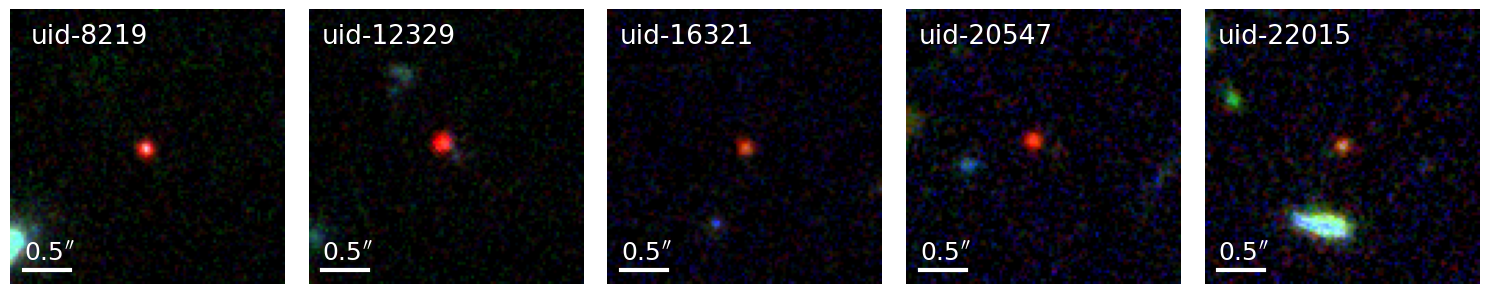

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb, AsinhStretch, MinMaxInterval, LuptonAsinhZscaleStretch
import os

# 定义源列表
source_ids = ['8219','12329','16321','20547','22015'] # 你需要补充完整

# 定义文件目录
base_dir = "/Users/zijianzhang/Astro_Data/LRD_SPEC/Narrowline_LRD_image/"

# 设定波段文件的关键词
bands = {
    "blue": "F115W",
    'blue2': "F090W",
    "green": "F200W",
    'green2': "F277W",
    "red": "F444W",
}

# 读取 FITS 文件的函数
def read_fits_image(filepath):
    with fits.open(filepath) as hdul:
        return hdul[0].data

# 创建子图
fig, axes = plt.subplots(1, len(source_ids), figsize=(15, 5))

for i, source in enumerate(source_ids):
    folder_path = os.path.join(base_dir, source)

    # 读取三个波段的 FITS 文件
    try:
        blue = read_fits_image(os.path.join(folder_path, f"{source}_{bands['blue']}_data.fits"))
    except:
        blue = read_fits_image(os.path.join(folder_path, f"{source}_{bands['blue2']}_data.fits"))
        print(f"Source {source} has no blue band, use blue2 instead.")
    try:
        green = read_fits_image(os.path.join(folder_path, f"{source}_{bands['green']}_data.fits"))
    except:
        green = read_fits_image(os.path.join(folder_path, f"{source}_{bands['green2']}_data.fits"))
        print(f"Source {source} has no green band, use green2 instead.")
    red = read_fits_image(os.path.join(folder_path, f"{source}_{bands['red']}_data.fits"))
    # 打印数据范围，检查是否异常
    # 归一化到 0-1 范围
    # interval = MinMaxInterval()
    # red = interval(red)
    # green = interval(green)
    # blue = interval(blue)
    # red[red < 0] = 0
    # green[green < 0] = 0
    # blue[blue < 0] = 0
    # print(f"Red: min={red.min()}, max={red.max()}")
    # print(f"Green: min={green.min()}, max={green.max()}")
    # print(f"Blue: min={blue.min()}, max={blue.max()}")
    # 处理 FITS 数据，归一化并合成 RGB
    # rgb_image = make_lupton_rgb(red, green, blue, stretch=1000, Q=1, stretch_object = LuptonAsinhZscaleStretch([red, green, blue]))
    rgb_image = make_lupton_rgb(red, green, blue, stretch=0.1, Q=0.005)

    # 画图
    axes[i].imshow(rgb_image, origin="lower")
    # axes[i].set_title(f"Source {source}")
    axes[i].text(0.29, 0.95, f"uid-{source}", ha="center", va="top", color="white", fontsize=19, transform=axes[i].transAxes)
    axes[i].axis("off")

    # Get the center coordinates of the object
    # wcs = fits.open(os.path.join(folder_path, f"{source}_{bands['red']}_data.fits"))[0].wcs
    # Draw a scale bar in the bottom left corner
    FWHM = 0.5  # Length of the scale bar in pixels
    size = 0.03
    scale_bar_text = r"$0.5^{\prime\prime}$"  # Text to display next to the scale bar
    # Coordinates for placing the scale bar in the bottom left corner
    scale_bar_x = 0.05  # Adjust as needed
    scale_bar_y = 0.05  # Adjust as needed
    axes[i].text(scale_bar_x, scale_bar_y+0.02, scale_bar_text, color='white', transform=axes[i].transAxes,
            fontsize=18, verticalalignment='bottom', horizontalalignment='left')
    axes[i].plot([scale_bar_x, scale_bar_x + 2*FWHM/(2*size)/100], [scale_bar_y, scale_bar_y],
            color='white', linewidth=3, transform=axes[i].transAxes)

plt.tight_layout()
plt.savefig('/Users/zijianzhang/Astro_Data/LRD_SPEC/Figure/RGB_image.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
2*FWHM/(2*size)

16.666666666666668

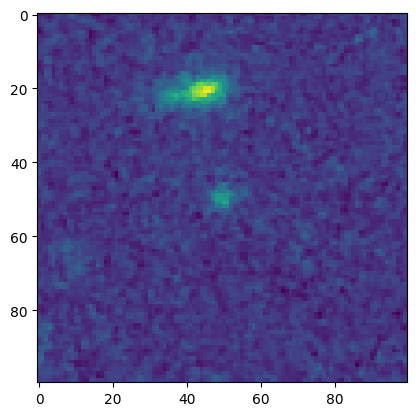

In [9]:
plt.imshow(red)